In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
def rename_col(x):
    if " " in x:
        return x.replace(" ","_").lower()
    else:
        return x.lower()
    
customer_df.columns = list(map(rename_col,customer_df.columns))  

In [7]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
# Change effective to date column to datetime format.
customer_df["effective_to_date"]= pd.to_datetime(customer_df["effective_to_date"])


In [9]:
# Create a NEW dataframe using only the numerical data called numerical_df.
numerical_df = customer_df.select_dtypes(exclude="object")

In [10]:
numerical_df.columns

Index(['customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [11]:
# Define a function that differentiates between continuous and discrete variables
numerical_df['effective_to_date'].nunique()

59

In [12]:
numerical_df["number_of_policies"].nunique()

9

In [13]:
discrete_df = []
continuous_df = []
def coun_dis(x):
    if numerical_df[x].nunique() <= 60:
        discrete_df.append(x)
        return discrete_df
    else:
        continuous_df.append(x)
        return continuous_df
    
a = list(map(coun_dis,numerical_df))    
display(discrete_df)
display(continuous_df)


['effective_to_date',
 'months_since_last_claim',
 'number_of_open_complaints',
 'number_of_policies']

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [14]:
customer_df[continuous_df]

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


<AxesSubplot:>

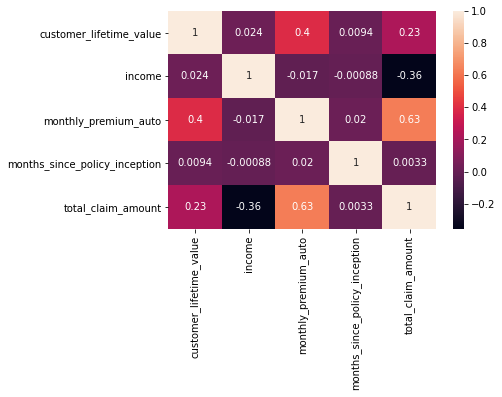

In [15]:
# Plot a correlation matrix, comment what you see.
sns.heatmap(customer_df[continuous_df].corr(), annot = True) 

In [16]:
# from the above heat map i could conclude following things
# 1) all most all the columns are not correlated with each other
# 2) our target monthly claim amount is very much depends on monthly premium auto 

<AxesSubplot:>

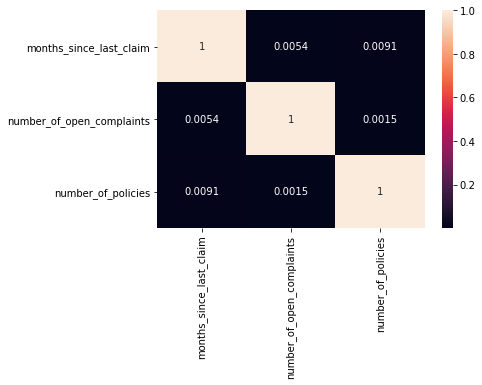

In [17]:
sns.heatmap(customer_df[discrete_df].corr(), annot = True) 

In [18]:
corr_matrix = customer_df.corr()["total_claim_amount"]
#corr_matrix = df.corr()['A']

In [19]:
corr_matrix

customer_lifetime_value          0.226451
income                          -0.355254
monthly_premium_auto             0.632017
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_open_complaints       -0.014241
number_of_policies              -0.002354
total_claim_amount               1.000000
Name: total_claim_amount, dtype: float64

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


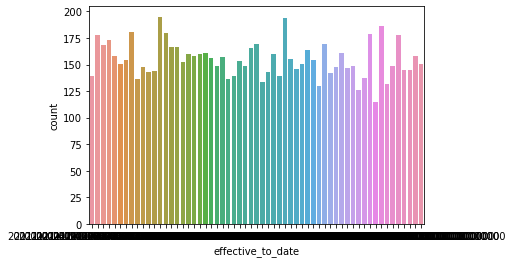

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


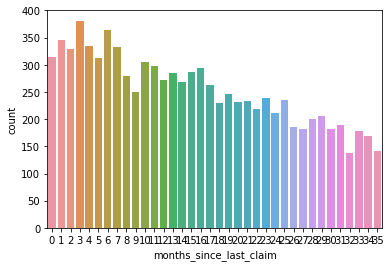

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


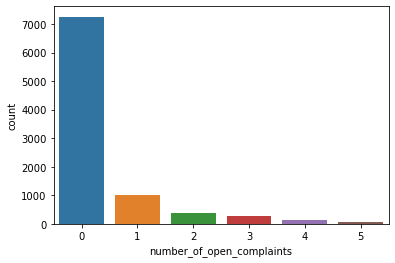

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


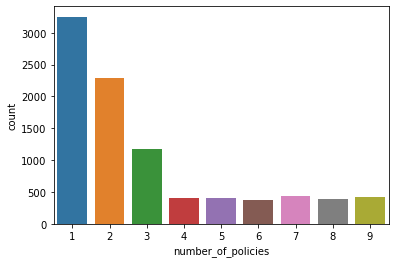

In [20]:
# Create a function to plot every discrete variable
def plot(x):
    for i in x.columns:
        sns.countplot(customer_df[i])
        plt.show()
plot(customer_df[discrete_df])

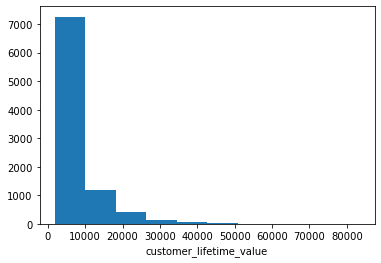

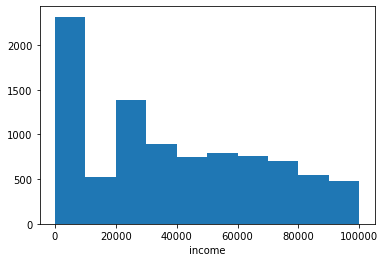

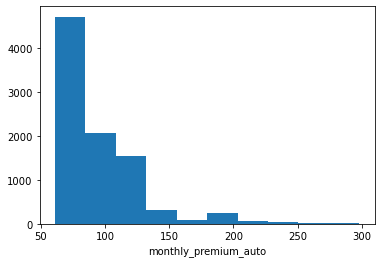

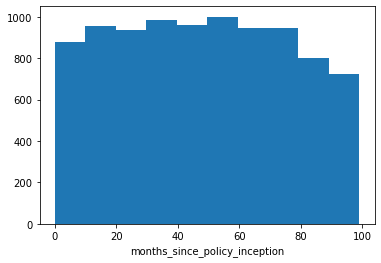

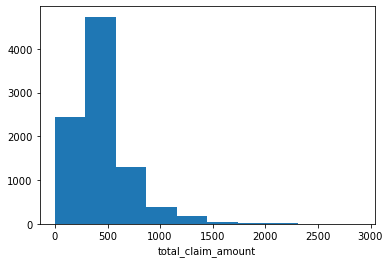

In [21]:
def plot(x):
    for i in x.columns:
        plt.hist(customer_df[i])
        plt.xlabel(i)
        plt.show()
plot(customer_df[continuous_df])

In [22]:
#Comments:

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


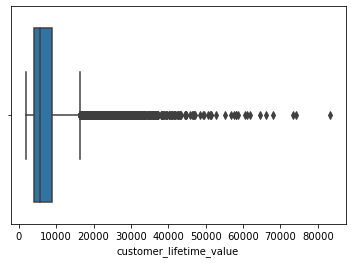

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


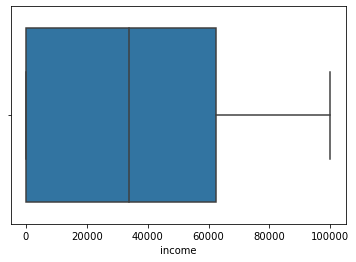

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


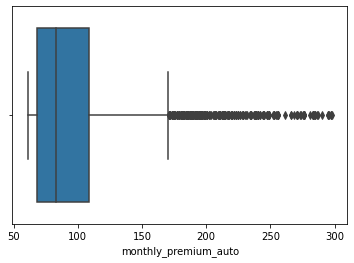

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


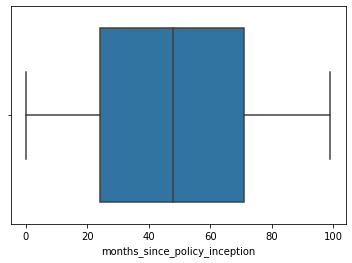

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


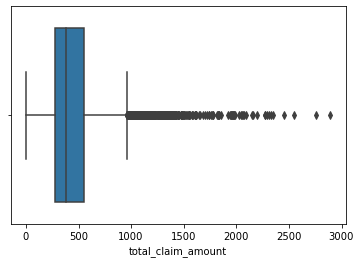

In [23]:
#Look for outliers in the continuous variables

def plot(x):
    for i in x.columns:
        sns.boxplot(customer_df[i])
        plt.xlabel(i)
        plt.show()
plot(customer_df[continuous_df])

In [24]:
customer_df["customer_lifetime_value"]


0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: customer_lifetime_value, Length: 9134, dtype: float64

In [25]:
# custormer life time has few outliers which needs to be taken care

In [26]:
customer_df[continuous_df].describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,99.000000,2893.239678


In [27]:
# treating outliers
def cap_floor(x):
    x=x.clip(lower = x.quantile(0.02))
    x = x.clip(upper = x.quantile(0.85))
    return (x)

In [28]:
customer_df["customer_lifetime_value"] = cap_floor(customer_df["customer_lifetime_value"])
customer_df["customer_lifetime_value"].describe()

count     9134.000000
mean      6718.986574
std       3329.180759
min       2336.989656
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      12383.877959
Name: customer_lifetime_value, dtype: float64

In [29]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [30]:
numerical_df .to_csv("numerical.csv")

# Analizing Categorical Columns

In [31]:
# Find all of the categorical data

In [32]:
categorical_df = customer_df.select_dtypes(include="object")

In [33]:
# Check for NaN values and decide what to do with them, do it now
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [34]:
# Check all unique values of columns
for i in categorical_df.columns:
    display("Category Name: ", i)
    display(categorical_df[i].value_counts())

'Category Name: '

'customer'

QH62059    1
CG90504    1
KJ48497    1
SD21312    1
GH36606    1
          ..
UK18731    1
CG60089    1
VA95584    1
CV13878    1
JS36322    1
Name: customer, Length: 9134, dtype: int64

'Category Name: '

'state'

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

'Category Name: '

'response'

No     7826
Yes    1308
Name: response, dtype: int64

'Category Name: '

'coverage'

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

'Category Name: '

'education'

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

'Category Name: '

'employmentstatus'

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

'Category Name: '

'gender'

F    4658
M    4476
Name: gender, dtype: int64

'Category Name: '

'location_code'

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

'Category Name: '

'marital_status'

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

'Category Name: '

'policy_type'

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

'Category Name: '

'policy'

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

'Category Name: '

'renew_offer_type'

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

'Category Name: '

'sales_channel'

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

'Category Name: '

'vehicle_class'

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

'Category Name: '

'vehicle_size'

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [35]:
categorical_df[(categorical_df['policy']=='Personal L3')| (categorical_df['policy']=='Corporate L3') ]

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,CB59349,California,No,Extended,Master,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer2,Agent,SUV,Medsize
9125,RX91025,California,No,Premium,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,SUV,Small
9127,TF56202,California,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize


In [36]:
#Conclusion from value counts
# 1) Customer : all unique values.. we can drop it
# 2) State : Here name of the states are given.. no need of processing
# 3) response : we can convert it into interger
# 4) coverage : we can do ordinal encoding   
# 5) Category Name: we can do ordinal encoding    
# 6) employmentstatus :  we can combine three categories
# 7) gender  : we can convert into integer
# 8) location code, marital status: nothing to be done
# 9) policy and policy_type are same .. we can drop policy_type
# 10) renew offer,sales_channel will keep 
# 11) Vehicle_class we can work on it (Luxury SUV and luxuty CAr we can merge it)

In [37]:
#renew_offer_type and policy are alpha numeric

    

In [38]:
# removing offer from renew_offer_type

categorical_df["renew_offer_type"] = categorical_df["renew_offer_type"].str.split("Offer").str.get(1)

<ipython-input-38-f337b752fdc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df["renew_offer_type"] = categorical_df["renew_offer_type"].str.split("Offer").str.get(1)


In [39]:
#policy and policy_type have data similarity  

a = categorical_df["policy"].str.split(" ").str.get(1)
categorical_df["policy"] = a.str.split("L").str.get(1)
# def new_policy(x):
#     a = ["Personal","Corporate","Special"]
#     if x in a:
#         return categorical_df[x].str.split(a).str.get(1)
    
# list(map(new_policy,categorical_df["policy"]))  

<ipython-input-39-5a0f10868f52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df["policy"] = a.str.split("L").str.get(1)


In [41]:
categorical_df["policy"]

0       3
1       3
2       3
3       2
4       1
       ..
9129    1
9130    3
9131    2
9132    2
9133    3
Name: policy, Length: 9134, dtype: object

In [47]:
# data wrangling on 'response' column
categorical_df["response"]  = np.where(categorical_df["response"] == "Yes",1,0)

<ipython-input-47-d89b88c3687a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df["response"]  = np.where(categorical_df["response"] == "Yes",1,0)


In [49]:
categorical_df["response"].value_counts()

0    7826
1    1308
Name: response, dtype: int64

In [51]:
# data wrangling on 'employmentstatus'

def new_employmentstatus(x):
    if x in ["Medical Leave","Disabled","Retired"]:
        return "other"
    else:
        return x
categorical_df['employmentstatus'] = list(map(new_employmentstatus,categorical_df['employmentstatus']))    

<ipython-input-51-5e9d7788f209>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['employmentstatus'] = list(map(new_employmentstatus,categorical_df['employmentstatus']))


In [53]:
categorical_df['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [54]:
categorical_df["gender"]  = np.where(categorical_df["gender"] == "F",1,0)

<ipython-input-54-19aebdfc2029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df["gender"]  = np.where(categorical_df["gender"] == "F",1,0)


In [56]:
categorical_df["gender"].value_counts()

1    4658
0    4476
Name: gender, dtype: int64

In [57]:
# policy_type and policy both contains same value in the different format
# I have converted policy into three types (1,2,3) and keep policy_type as it is. 
# because if we do not process policy then it will have so many columns while enocing
categorical_df[['policy_type','policy']] # only by using number 1,2,3 in policy we can say which policy by looking into policy_type 


,policy_type,policy
0,Corporate Auto,3
1,Personal Auto,3
2,Personal Auto,3
3,Corporate Auto,2
4,Personal Auto,1
...,...,...
9129,Personal Auto,1
9130,Corporate Auto,3
9131,Corporate Auto,2
9132,Personal Auto,2


In [60]:
categorical_df['policy_type'].str.replace("Auto","")

0       Corporate 
1        Personal 
2        Personal 
3       Corporate 
4        Personal 
           ...    
9129     Personal 
9130    Corporate 
9131    Corporate 
9132     Personal 
9133    Corporate 
Name: policy_type, Length: 9134, dtype: object

In [62]:
categorical_df.dtypes

customer            object
state               object
response             int32
coverage            object
education           object
employmentstatus    object
gender               int32
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [63]:
# here response and gender is converted into int
categorical_df.to_csv("categorical.csv") # we can discard gender and response from this csv

In [ ]:
numerical_df .to_csv("numerical.csv") # we can add gender and response into this csv

In [ ]:
# numerical_df = pd.read_csv("numerical.csv")
# numerical_df["gender"] = categorical_df["gender"]
# numerical_df["response"] = categorical_df["response"]
# categorical_df.drop(["gender","response"],axis =1, inplace = True)